In [1]:
# Importing Relevant Libraries 
import pandas as pd
import openpyxl
import os
import sqlalchemy
import pymysql
import sqlalchemy as db
import sqlitecloud
import numpy as np
from numpy import sqrt 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy import optimize
import csv
import itertools
from collections import ChainMap
import unittest
import socket
import requests

#from googlemaps import GoogleMaps
#from geopy.geocoders import Nominatim
#import geopandas as gpd
#from ip2geotools.databases.noncommercial import DbIpCity
#from geopy.distance import distance

In [2]:
class Importing_Datasets:
    
    def __init__ (self, filename):
        
        # Importing E-Commerce Data Set from CSV File for Analysis
        try:
            self.data = pd.read_csv(filename)
            print(self.data.columns) 
            
        except FileNotFoundError:
            raise Exception(f"The File titled {filename} is not found.")
            
        except pd.errors.EmptyDataError:
            raise Exception("The Selected File is empty")
            
        except pd.errors.ParserError:
            raise Exception("The Selected File format is incorrect")
            
        return
    
    # Calculate the mean of one of the columns in the dataset of the file that has been import through an instance of this class.
#    def mean(self):       
#        mean_input = self.data["y1"].mean()      
#        return mean_input

    # Importing of the Dataset that is called in an instance of the file. 
    def import_datasets(self):
        
        return self.data

In [3]:
import_e_com_fraud = Importing_Datasets("Fraudulent_E-Commerce_Transaction_Data.csv")

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')


In [4]:
e_com_fraud = import_e_com_fraud.import_datasets()

In [5]:
e_com_fraud.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [6]:
e_com_fraud.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06,1.472952e+06
mean,2.267683e+02,3.000230e+00,3.451208e+01,5.012926e-02,1.796464e+02,1.128696e+01
std,2.703951e+02,1.414736e+00,1.000313e+01,2.182117e-01,1.068642e+02,6.975995e+00
min,1.000000e+01,1.000000e+00,-1.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.861000e+01,2.000000e+00,2.800000e+01,0.000000e+00,8.600000e+01,5.000000e+00
50%,1.517600e+02,3.000000e+00,3.500000e+01,0.000000e+00,1.790000e+02,1.100000e+01
75%,2.960500e+02,4.000000e+00,4.100000e+01,0.000000e+00,2.720000e+02,1.700000e+01
max,1.270175e+04,5.000000e+00,8.600000e+01,1.000000e+00,3.650000e+02,2.300000e+01


In [7]:
e_com_fraud.dtypes

Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object

In [8]:
# Check for null values in Dataset per column:
display(e_com_fraud.isnull().sum())
print("Hence, there is no null value in any of the columns")

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

Hence, there is no null value in any of the columns


In [9]:
class Pre_Analysis:
    
    def __init__(self, e_commerce_fraud_data):
        
        self.data = pd.DataFrame(e_commerce_fraud_data)
        new_data = self.data
        
        return
    
    def e_com_fraud_data(self):
        
        return self.data
    
    def new_e_com_fraud_data(self):
        
        return new_data
    
          
    def column_mean(self):
        
        self.mean_input_trn_amt = self.data["Transaction Amount"].mean()
        self.mean_input_qty = self.data["Quantity"].mean()
        self.mean_input_cust_age = self.data["Customer Age"].mean()
        self.mean_input_acc_age = self.data["Account Age Days"].mean()
        self.mean_input_trn_hr = self.data["Transaction Hour"].mean()
        print("Transaction Amount Average:", format(self.mean_input_trn_amt))
        print("Quantity Average:", format(self.mean_input_qty))
        print("Customer Age Average:", format(self.mean_input_cust_age))
        print("Account Age Average:", format(self.mean_input_acc_age))
        print("Transaction Hour Average:", format(self.mean_input_trn_hr))
        
    
#    def distribution_plot(self):
        
#        self.qty = self.data["Quantity"]
#        self.cust_age = self.data["Customer Age"]
#        self.acc_age = self.data["Account Age Days"]
#        self.trn_hr = self.data["Transaction Hour"]
#        plt.hist(self.qty, color='lightgreen', ec='black', bins=15)
#        plt.hist(self.cust_age, color='lightgreen', ec='black', bins=15)
#        plt.hist(self.acc_age, color='lightgreen', ec='black', bins=15)
#        plt.hist(self.trn_hr, color='lightgreen', ec='black', bins=15)
        
    
    def histogram_plot(self):
        
        self.trn_amt = self.data["Transaction Amount"]
        self.qty = self.data["Quantity"]
        self.cust_age = self.data["Customer Age"]
        self.acc_age = self.data["Account Age Days"]
        self.input_trn_hr = self.data["Transaction Hour"]

        sns.displot(self.trn_amt, kde=True, bins=15)
        sns.displot(self.qty, kde=True, bins=15)
        sns.displot(self.cust_age, kde=True, bins=15)
        sns.displot(self.acc_age, kde=True, bins=15)
        sns.displot(self.input_trn_hr, kde=True, bins=15)
        
        
    def bar_graph(self):
        
        self.prod_cat = self.data["Payment Method"]
        self.prod_cat_dict = self.prod_cat.to_dict()
        self.prod_cat_keys = list(self.prod_cat_dict.keys())
        self.prod_cat_values = list(self.prod_cat_dict.values())
        
        plt.bar(self.prod_cat, values, color ='maroon', 
        width = 0.4)        

In [10]:
init_e_com_fraud = Pre_Analysis(e_com_fraud)

In [11]:
init_e_com_fraud_mean = init_e_com_fraud.column_mean()

Transaction Amount Average: 226.7683092388607
Quantity Average: 3.00023015006599
Customer Age Average: 34.5120811811926
Account Age Average: 179.64639784595832
Transaction Hour Average: 11.28696386576073


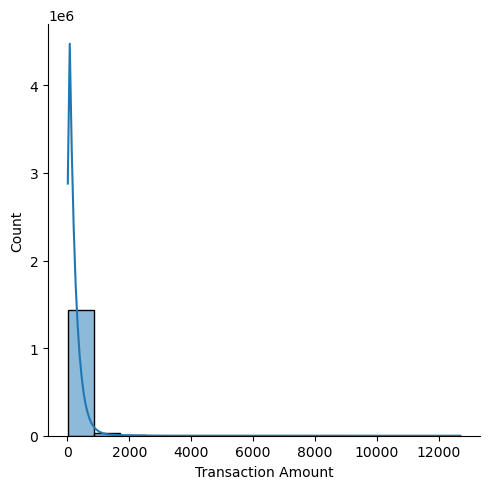

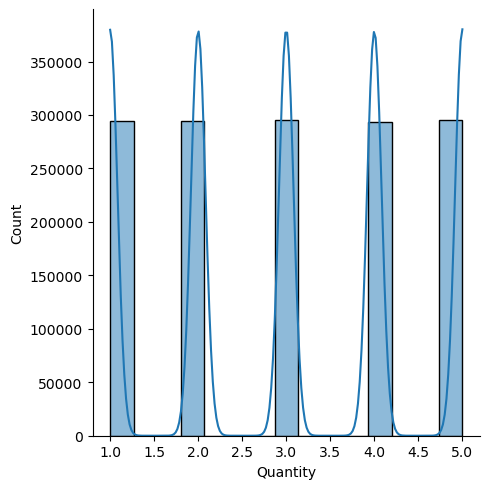

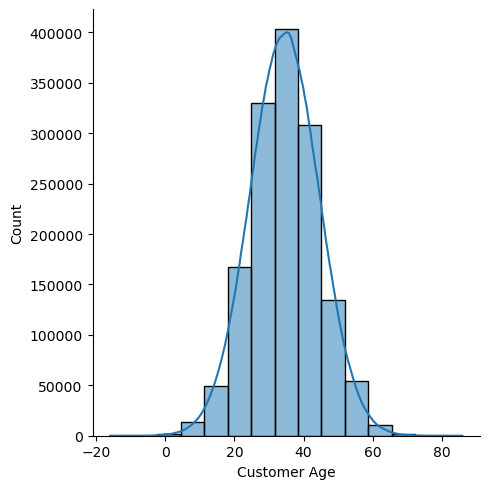

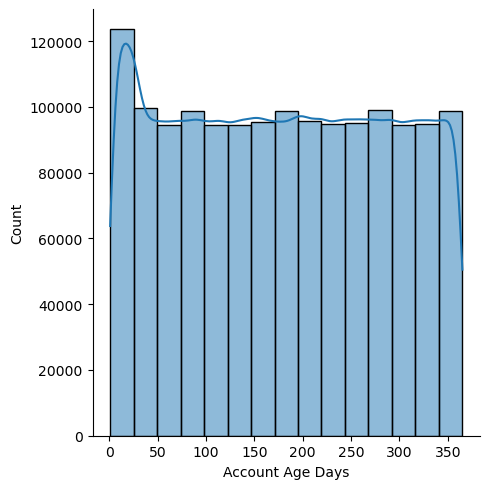

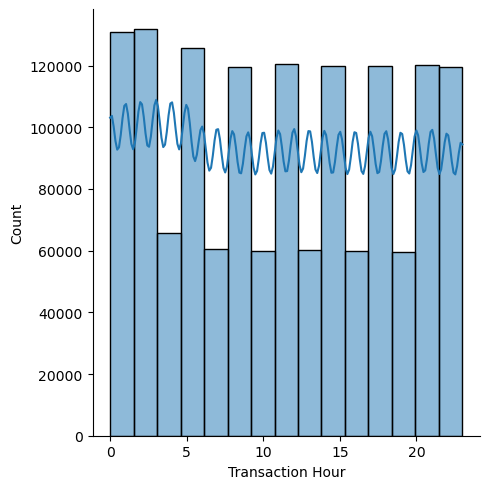

In [12]:
init_e_com_fraud_distr_plot = init_e_com_fraud.histogram_plot()

In [13]:
#init_e_com_fraud.bar_graph()

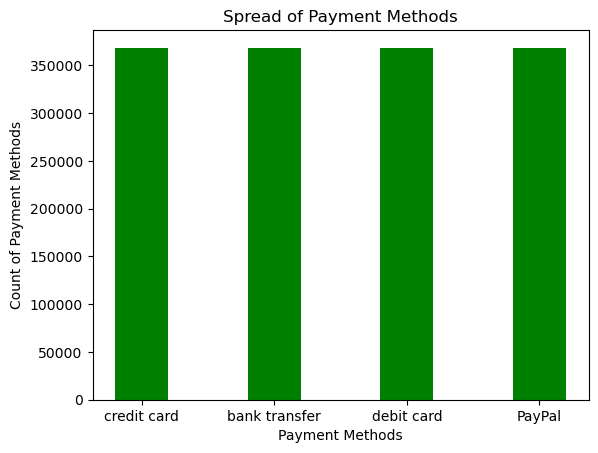

In [14]:
grp_pmt_mthd = e_com_fraud["Payment Method"].value_counts()
grp_pmt_mthd_dict = grp_pmt_mthd.to_dict()
grp_pmt_mthd_dict_keys = grp_pmt_mthd_dict.keys()
grp_pmt_mthd_dict_values = grp_pmt_mthd_dict.values()
plt.bar(grp_pmt_mthd_dict_keys, grp_pmt_mthd_dict_values, color ='Green', width = 0.4)
   
# The Title of the Bar Graph:
plt.title("Spread of Payment Methods")
     
# The Labels f the X ans Y Axis:
plt.xlabel("Payment Methods")
plt.ylabel("Count of Payment Methods")

# Showing the Graph Plot:
plt.show()
#print(grp_pmt_mthd)
#print(grp_pmt_mthd_dict)

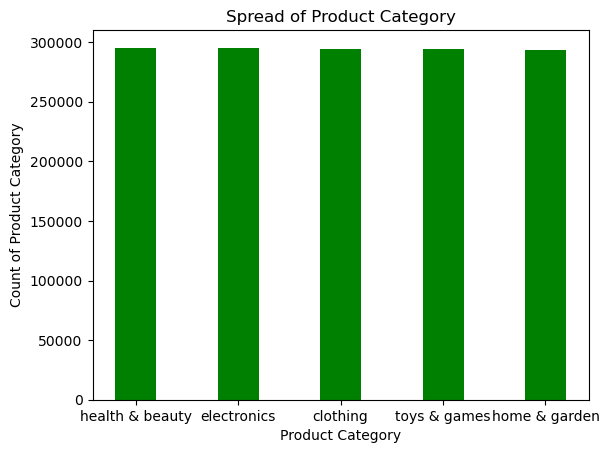

In [15]:
grp_prod_cat = e_com_fraud["Product Category"].value_counts()
grp_prod_cat_dict = grp_prod_cat.to_dict()
grp_prod_cat_dict_keys = grp_prod_cat_dict.keys()
grp_prod_cat_dict_values = grp_prod_cat_dict.values()
plt.bar(grp_prod_cat_dict_keys, grp_prod_cat_dict_values, color ='Green', width = 0.4)

# The Title of the Bar Graph:
plt.title("Spread of Product Category")
     
# The Labels f the X ans Y Axis:
plt.xlabel("Product Category")
plt.ylabel("Count of Product Category")

# Showing the Graph Plot:
plt.show()

plt.show()

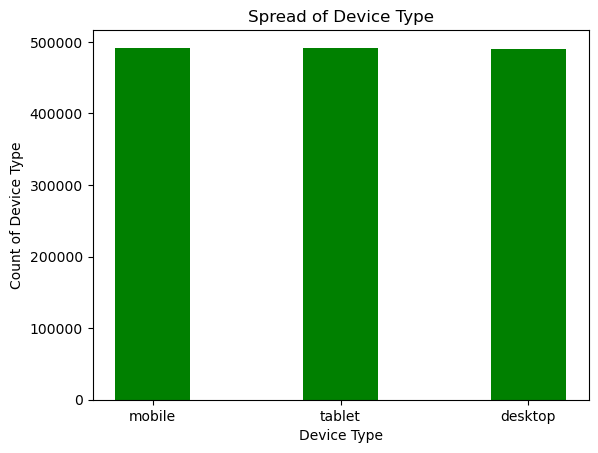

In [16]:
grp_dev_used = e_com_fraud["Device Used"].value_counts()
grp_dev_used_dict = grp_dev_used.to_dict()
grp_dev_used_dict_keys = grp_dev_used_dict.keys()
grp_dev_used_dict_values = grp_dev_used_dict.values()
plt.bar(grp_dev_used_dict_keys, grp_dev_used_dict_values, color ='Green', width = 0.4)

# The Title of the Bar Graph:
plt.title("Spread of Device Type")
     
# The Labels f the X ans Y Axis:
plt.xlabel("Device Type")
plt.ylabel("Count of Device Type")

plt.show()

In [17]:
#grp_cust_loc = e_com_fraud["Customer Location"].value_counts()
#grp_cust_loc_dict = grp_cust_loc.to_dict()
#grp_cust_loc_dict_keys = grp_cust_loc_dict.keys()
#grp_cust_loc_dict_values = grp_cust_loc_dict.values()
#plt.bar(grp_cust_loc_dict_keys, grp_cust_loc_dict_values, color ='Green', width = 0.4)
#plt.show()

In [18]:
#Spread of Count of Customer Location:
grp_cust_loc = e_com_fraud["Customer Location"].value_counts()
print(grp_cust_loc)

New Michael            1258
South Michael          1209
East Michael           1206
Port Michael           1204
West Michael           1201
                       ... 
South Candiceburgh        1
North Rogerhaven          1
East Alejandroville       1
Lake Cheyenneview         1
South Melvinburgh         1
Name: Customer Location, Length: 99135, dtype: int64


In [19]:
#Spread of Count of Transaction ID Location:
grp_trans_id = e_com_fraud["Transaction ID"].value_counts()
print(grp_trans_id)

15d2e414-8735-46fc-9e02-80b472b2580f    1
801ec9df-b62a-42e3-b7c3-beb89c1fe5ed    1
3898857a-e1ce-4003-8f3c-8949cea9a261    1
0a9d31e7-e750-4a56-9f6b-91e1995d11ad    1
a80da66f-a207-4ead-87bd-d10d57f2d045    1
                                       ..
9ea35ab2-6149-4a5e-a39c-c6015a6f70da    1
7cfa91b9-9941-4c99-87c4-e7a6ecf0d6dd    1
8a922caa-9ed2-4eba-9c07-7ae5afb8afe4    1
e45cb3ba-53f2-4e15-a722-d467c3f09a4e    1
d1a811a2-6015-47fa-95e5-0a5282755932    1
Name: Transaction ID, Length: 1472952, dtype: int64


In [20]:
#Spread of Count of Customer ID Location:
grp_cust_id = e_com_fraud["Customer ID"].value_counts()
print(grp_cust_id)

d1b87f62-51b2-493b-ad6a-77e0fe13e785    1
44f193d5-56f3-4133-870a-0b38a400a7d4    1
c97c57e8-c1ef-46fe-9dfb-410a9646f99c    1
c8a4427f-e684-4bd7-81ca-179f783d7df6    1
ee466c69-4bc2-4b7e-91a7-ac990a20a451    1
                                       ..
f5fe44f5-9370-44f8-b53c-37310a317884    1
8b552165-a1ca-488b-9387-4a1b58a2ebdb    1
baa12435-5774-4f85-97f1-a6b2e340fcc8    1
20fffda5-bba1-4f04-8874-dc6f0a9c06f9    1
637d5ed1-a4af-4234-a1d9-a3791b6f1bb6    1
Name: Customer ID, Length: 1472952, dtype: int64


In [21]:
#Spread of Count of Customer Location:
grp_ip_addr = e_com_fraud["IP Address"].value_counts()
print(grp_ip_addr)

170.118.178.249    2
40.173.110.187     2
221.95.171.82      2
157.14.79.59       2
100.9.174.89       2
                  ..
8.108.160.86       1
204.110.29.108     1
110.98.84.96       1
30.225.228.61      1
107.116.208.218    1
Name: IP Address, Length: 1472651, dtype: int64


In [22]:
#Spread of Count of Payment Method Location:
grp_pmt_mthd = e_com_fraud["Payment Method"].value_counts()
print(grp_pmt_mthd)

credit card      368429
bank transfer    368278
debit card       368277
PayPal           367968
Name: Payment Method, dtype: int64


In [23]:
#Spread of Count of Product Category Location:
grp_prod_cat = e_com_fraud["Product Category"].value_counts()
print(grp_prod_cat)

health & beauty    295367
electronics        295294
clothing           294319
toys & games       294266
home & garden      293706
Name: Product Category, dtype: int64


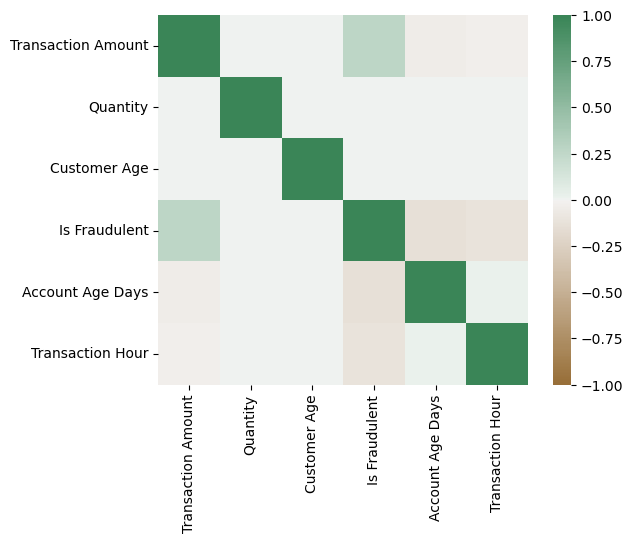

In [24]:
# Correlation Matrix:

Corr_Matrix = round(e_com_fraud.corr(),2)

axis_corr = sns.heatmap(
Corr_Matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()
#print(Corr_Matrix)

# Feature Engineering:

In [25]:
class feature_eng():
    
    def __init__(self, e_commerce_fraud_data):
        
        self.data = pd.DataFrame(e_commerce_fraud_data)
        self.data_x_num = self.data[["Transaction Amount", "Quantity", "Customer Age", "Account Age Days", "Transaction Hour"]]
        self.data_x_cat = self.data[["Payment Method", "Product Category", "Customer Location", "Device Used", "Billing Address", 
                                     "Shipping Address"]]
        self.data_y = self.data[["Is Fraudulent"]]
        
        
    def normalize_x_num_var(self):
        
        # Standardization Object:
        std_scalar = StandardScaler()
        
        # Standardization of Training Data:
        self.data_x_num_std = std_scalar.fit_transform(self.data_x_num)
        
        # Standardized (Transformed) Data:
        self.data_x_num_std = pd.DataFrame(self.data_x_num_std, columns = self.data_x_num.columns)
        
        #display(self.data_x_num_std)
        return self.data_x_num_std
    
    
    def normalize_x_cat(self):

        self.data_x_cat_hot_enc = pd.get_dummies(self.data_x_cat[['Payment Method','Product Category','Device Used']])
        return self.data_x_cat_hot_enc
        
        
    def final_encoded_data(self):
        
        self.data_nor_enc = [self.data_x_num_std, self.data_x_cat_hot_enc]
        self.data_nor_enc = pd.concat([self.data_x_num_std, self.data_x_cat_hot_enc], axis=1, join="inner")
        
        return self.data_nor_enc
        
        

In [26]:
ft_eng = feature_eng(e_com_fraud)

In [27]:
ft_eng.normalize_x_num_var()

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour
0,-0.623822,-1.413854,-1.750660,-1.400342,-0.901229
1,0.603531,-0.707008,0.548620,-1.007320,-0.471182
2,-0.342382,-0.707008,-1.250816,-1.091539,-1.187926
3,-0.002213,1.413529,-0.351098,-0.520721,1.249003
4,-0.389202,-0.707008,1.648276,-0.202560,-0.901229
...,...,...,...,...,...
1472947,-0.067636,-0.707008,-0.551036,-0.286779,1.679049
1472948,0.017758,-0.707008,-0.251129,-0.445859,-1.044577
1472949,-0.462169,0.706683,0.148745,-0.764020,1.679049
1472950,-0.610101,1.413529,-0.051192,0.106243,0.675608


In [28]:
ft_eng.normalize_x_cat()

,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,1,0,0,0,0,0,1,0,0,1,0,0
1472948,0,0,1,0,1,0,0,0,0,0,0,1
1472949,0,1,0,0,0,1,0,0,0,0,1,0
1472950,0,1,0,0,0,1,0,0,0,1,0,0


In [29]:
# Final Dataset After Normalization and Encoding:
df_final_encoded_data = ft_eng.final_encoded_data()
display(df_final_encoded_data)

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,-0.623822,-1.413854,-1.750660,-1.400342,-0.901229,0,1,0,0,0,1,0,0,0,0,0,1
1,0.603531,-0.707008,0.548620,-1.007320,-0.471182,0,0,0,1,0,1,0,0,0,1,0,0
2,-0.342382,-0.707008,-1.250816,-1.091539,-1.187926,1,0,0,0,0,0,0,1,0,0,0,1
3,-0.002213,1.413529,-0.351098,-0.520721,1.249003,0,1,0,0,1,0,0,0,0,1,0,0
4,-0.389202,-0.707008,1.648276,-0.202560,-0.901229,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,-0.067636,-0.707008,-0.551036,-0.286779,1.679049,1,0,0,0,0,0,1,0,0,1,0,0
1472948,0.017758,-0.707008,-0.251129,-0.445859,-1.044577,0,0,1,0,1,0,0,0,0,0,0,1
1472949,-0.462169,0.706683,0.148745,-0.764020,1.679049,0,1,0,0,0,1,0,0,0,0,1,0
1472950,-0.610101,1.413529,-0.051192,0.106243,0.675608,0,1,0,0,0,1,0,0,0,1,0,0


In [30]:
class Post_std_enc_analysis(Pre_Analysis):
    
    pass
    
    def __init__(self, e_commerce_fraud_data):       
        super().__init__(e_commerce_fraud_data)
        self.data = e_commerce_fraud_data
        
        
    def display_enc(self):  
        return self.data
    
    def foo(self):
        super(Post_std_enc_analysis, self).histogram_plot()   # calls 'A.foo()'

In [31]:
post_ft_eng_e_com_fraud = Post_std_enc_analysis(df_final_encoded_data)

In [32]:
post_ft_eng_e_com_fraud_data = post_ft_eng_e_com_fraud.display_enc()
display(post_ft_eng_e_com_fraud_data)

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,-0.623822,-1.413854,-1.750660,-1.400342,-0.901229,0,1,0,0,0,1,0,0,0,0,0,1
1,0.603531,-0.707008,0.548620,-1.007320,-0.471182,0,0,0,1,0,1,0,0,0,1,0,0
2,-0.342382,-0.707008,-1.250816,-1.091539,-1.187926,1,0,0,0,0,0,0,1,0,0,0,1
3,-0.002213,1.413529,-0.351098,-0.520721,1.249003,0,1,0,0,1,0,0,0,0,1,0,0
4,-0.389202,-0.707008,1.648276,-0.202560,-0.901229,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,-0.067636,-0.707008,-0.551036,-0.286779,1.679049,1,0,0,0,0,0,1,0,0,1,0,0
1472948,0.017758,-0.707008,-0.251129,-0.445859,-1.044577,0,0,1,0,1,0,0,0,0,0,0,1
1472949,-0.462169,0.706683,0.148745,-0.764020,1.679049,0,1,0,0,0,1,0,0,0,0,1,0
1472950,-0.610101,1.413529,-0.051192,0.106243,0.675608,0,1,0,0,0,1,0,0,0,1,0,0


In [33]:
post_e_com_fraud_distr_plot = post_ft_eng_e_com_fraud.histogram_plot()
#display(post_e_com_fraud_distr_plot)

In [34]:
post_e_com_fraud_distr_plot = post_ft_eng_e_com_fraud.foo()

In [35]:
display(post_e_com_fraud_distr_plot)

None

In [36]:
import re
import json
#from urllib2 import urlopen

In [37]:
def get_ip():
    response = requests.get('https://api64.ipify.org?format=json').json()
    return response["ip"]


In [38]:
def get_location():
    ip_address = get_ip()
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name")
    }
    return location_data

In [39]:
#print(get_location())

In [40]:
def get_location():
    ip_address = "212.195.49.198"
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name")
    }
    return location_data

In [41]:
#get_location()

In [42]:
#import ipinfo
#import sys

In [43]:
#import sys

import requests

# Replace YOUR_API_KEY with your actual API key. Sign up and get an API key on https://www.geoapify.com/ 
API_KEY = "212.195.49.198"

# Define the address to geocode
address = "1600 Amphitheatre Parkway, Mountain View, CA"

# Build the API URL
url = f"https://api.geoapify.com/v1/geocode/search?text={address}&limit=1&apiKey={API_KEY}"

# Send the API request and get the response
response = requests.get(url)

# Check the response status code
if response.status_code == 200:
    # Parse the JSON data from the response
    data = response.json()

    # Extract the first result from the data
    result = data["features"][0]

    # Extract the latitude and longitude of the result
    latitude = result["geometry"]["coordinates"][1]
    longitude = result["geometry"]["coordinates"][0]

    print(f"Latitude: {latitude}, Longitude: {longitude}")
else:
    print(f"Request failed with status code {response.status_code}")

In [44]:
acc_age_days = post_ft_eng_e_com_fraud_data["Account Age Days"]
#display(acc_age_days)
sns.displot(acc_age_days, kde=True, bins=15)